In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## VIF for linear model using demeaned regressors

In [2]:
data = pd.read_csv('/Users/kellymorrow/Desktop/MAX101_gPPI_demean_regs.csv')
X = data[['FNS', 'FNT', 'FPS', 'FPT', 'RNS', 'RNT', 'RPS', 'RPT', 'r_FNS', 'r_FNT','r_FPS', 'r_FPT', 'r_RNS','r_RNT','r_RPS','r_RPT','l-CrusII_seed','gPPI_FNS','gPPI_FNT','gPPI_FPS','gPPI_FPT','gPPI_RNS','gPPI_RNT','gPPI_RPS','gPPI_RPT','gPPI_rate_FNS','gPPI_rate_FNT','gPPI_rate_FPS','gPPI_rate_FPT','gPPI_rate_RNS','gPPI_rate_RNT','gPPI_rate_RPS','gPPI_rate_RPT']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF-demeaned"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

print(vif_data)

          feature  VIF-demeaned
0             FNS      1.902837
1             FNT      1.895321
2             FPS      1.949764
3             FPT      1.906976
4             RNS      1.388697
5             RNT      1.303633
6             RPS      1.502911
7             RPT      1.174514
8           r_FNS      1.232188
9           r_FNT      1.239657
10          r_FPS      1.242127
11          r_FPT      1.299018
12          r_RNS      1.387939
13          r_RNT      1.268257
14          r_RPS      1.614693
15          r_RPT      1.032926
16  l-CrusII_seed      6.300492
17       gPPI_FNS      1.978294
18       gPPI_FNT      2.940153
19       gPPI_FPS      4.017138
20       gPPI_FPT      2.358007
21       gPPI_RNS      1.577071
22       gPPI_RNT      1.722390
23       gPPI_RPS      2.873061
24       gPPI_RPT      1.668374
25  gPPI_rate_FNS      1.129703
26  gPPI_rate_FNT      1.175302
27  gPPI_rate_FPS      1.271473
28  gPPI_rate_FPT      1.280265
29  gPPI_rate_RNS      1.096419
30  gPPI

### Look at covariance between terms

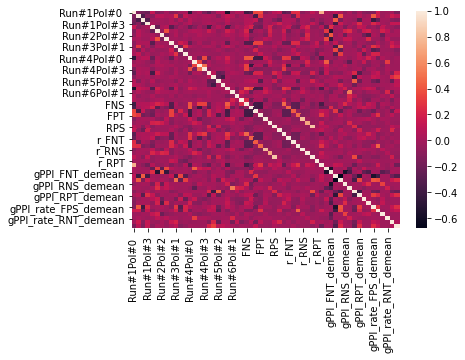

In [3]:
data = pd.read_csv('/Users/kellymorrow/Desktop/MAX101_pairwise_correlation_demean.csv')

#print(data)

df = pd.DataFrame(data)

corrMatrix = df.corr()
#print(corrMatrix)

sn.heatmap(corrMatrix)
plt.show()

## VIF for linear model not using demeaned regressors

In [4]:
data = pd.read_csv('/Users/kellymorrow/Desktop/MAX101_gPPI_NoDemean_regs.csv')
X = data[['FNS', 'FNT', 'FPS', 'FPT', 'RNS', 'RNT', 'RPS', 'RPT', 'r_FNS', 'r_FNT','r_FPS', 'r_FPT', 'r_RNS','r_RNT','r_RPS','r_RPT','l-CrusII_seed','gPPI_FNS_NoDemean','gPPI_FNT_NoDemean','gPPI_FPS_NoDemean','gPPI_FPT_NoDemean','gPPI_RNS_NoDemean','gPPI_RNT_NoDemean','gPPI_RPS_NoDemean','gPPI_RPT_NoDemean', 'gPPI_rate_FNS_NoDemean','gPPI_rate_FNT_NoDemean','gPPI_rate_FPS_NoDemean','gPPI_rate_FPT_NoDemean','gPPI_rate_RNS_NoDemean','gPPI_rate_RNT_NoDemean','gPPI_rate_RPS_NoDemean','gPPI_rate_RPT_NoDemean']]

vif_data_ndm = pd.DataFrame()
vif_data_ndm["feature"] = X.columns

vif_data_ndm["VIF-NoDemean"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

print(vif_data_ndm)

                   feature  VIF-NoDemean
0                      FNS      2.360356
1                      FNT      2.176128
2                      FPS      2.401320
3                      FPT      2.501948
4                      RNS      1.405264
5                      RNT      1.288559
6                      RPS      1.509385
7                      RPT      1.308645
8                    r_FNS      1.552830
9                    r_FNT      1.576222
10                   r_FPS      1.520681
11                   r_FPT      1.490163
12                   r_RNS      1.647611
13                   r_RNT      1.545592
14                   r_RPS      1.710579
15                   r_RPT      1.240249
16           l-CrusII_seed      9.847959
17       gPPI_FNS_NoDemean      2.216769
18       gPPI_FNT_NoDemean      2.116981
19       gPPI_FPS_NoDemean      2.217115
20       gPPI_FPT_NoDemean      2.392472
21       gPPI_RNS_NoDemean      1.497973
22       gPPI_RNT_NoDemean      1.849396
23       gPPI_RP

In [7]:
vif_df = pd.DataFrame()
vif_df["feature"] = vif_data["feature"]
vif_df["VIF-demean"] = vif_data["VIF-demeaned"]
vif_df["VIF-NoDemean"] = vif_data_ndm["VIF-NoDemean"]

In [9]:
vif_df


vif_df.to_csv(r'vif_demean_comparison.csv', index = False)